In [11]:
# basic
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# visualization
import cv2
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

In [12]:
# クラス名の確認
class_names = os.listdir('../data/seg_train')
class_name_labels = {class_name: i for i, class_name in enumerate(class_names)}

class_names, class_name_labels

(['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea'],
 {'forest': 0,
  'buildings': 1,
  'glacier': 2,
  'street': 3,
  'mountain': 4,
  'sea': 5})

### データのnumpy化

In [13]:
# image size
def load_data(concat: bool = True, image_size: tuple = None):

    datasets = ['../data/seg_train', '../data/seg_test']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_name_labels[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder)), desc=f"[{folder}]\t"):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                if image_size is not None:
                    image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        if concat:
            images = np.array(images, dtype = 'float32')
            labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [14]:
(train_images, train_labels), (test_images, test_labels) = load_data(concat=False)

Loading ../data/seg_train


[forest]	:   0%|          | 0/2271 [00:00<?, ?it/s]

[buildings]	:   0%|          | 0/2191 [00:00<?, ?it/s]

[glacier]	:   0%|          | 0/2404 [00:00<?, ?it/s]

[street]	:   0%|          | 0/2382 [00:00<?, ?it/s]

[mountain]	:   0%|          | 0/2512 [00:00<?, ?it/s]

[sea]	:   0%|          | 0/2274 [00:00<?, ?it/s]

Loading ../data/seg_test


[forest]	:   0%|          | 0/474 [00:00<?, ?it/s]

[buildings]	:   0%|          | 0/437 [00:00<?, ?it/s]

[glacier]	:   0%|          | 0/553 [00:00<?, ?it/s]

[street]	:   0%|          | 0/501 [00:00<?, ?it/s]

[mountain]	:   0%|          | 0/525 [00:00<?, ?it/s]

[sea]	:   0%|          | 0/510 [00:00<?, ?it/s]

### 画像のサイズ確認

- 基本的には150x150が多いので、これを基準にする

In [5]:
image_size_train = [image.shape for image in train_images]
image_size_train_unique = {size: image_size_train.count(size) for size in set(image_size_train)}
image_size_train_unique

{(143, 150, 3): 2,
 (131, 150, 3): 1,
 (144, 150, 3): 2,
 (103, 150, 3): 1,
 (81, 150, 3): 1,
 (150, 150, 3): 13986,
 (113, 150, 3): 7,
 (140, 150, 3): 1,
 (124, 150, 3): 1,
 (102, 150, 3): 1,
 (100, 150, 3): 1,
 (136, 150, 3): 2,
 (134, 150, 3): 2,
 (149, 150, 3): 1,
 (76, 150, 3): 1,
 (115, 150, 3): 1,
 (110, 150, 3): 1,
 (108, 150, 3): 2,
 (135, 150, 3): 3,
 (133, 150, 3): 1,
 (145, 150, 3): 1,
 (111, 150, 3): 3,
 (123, 150, 3): 2,
 (146, 150, 3): 2,
 (105, 150, 3): 1,
 (147, 150, 3): 1,
 (141, 150, 3): 1,
 (119, 150, 3): 1,
 (97, 150, 3): 1,
 (142, 150, 3): 2,
 (120, 150, 3): 1}

Text(0, 0.5, 'y')

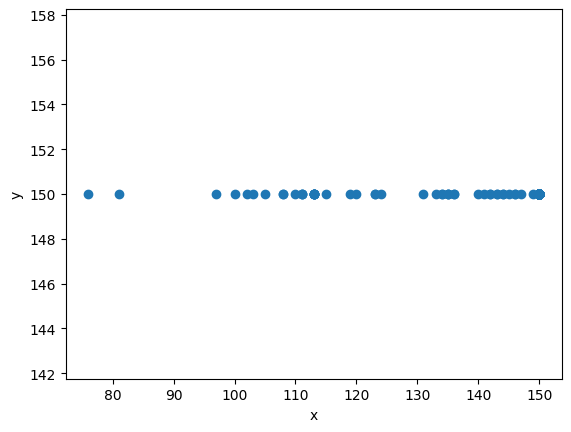

In [6]:
x = [size[0] for size in image_size_train]
y = [size[1] for size in image_size_train]
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

In [7]:
image_size_test = [image.shape for image in test_images]
image_size_test_unique = {size: image_size_test.count(size) for size in set(image_size_test)}
image_size_test_unique

{(76, 150, 3): 1,
 (149, 150, 3): 1,
 (131, 150, 3): 1,
 (72, 150, 3): 1,
 (81, 150, 3): 1,
 (141, 150, 3): 1,
 (110, 150, 3): 1,
 (150, 150, 3): 2993}

Text(0, 0.5, 'y')

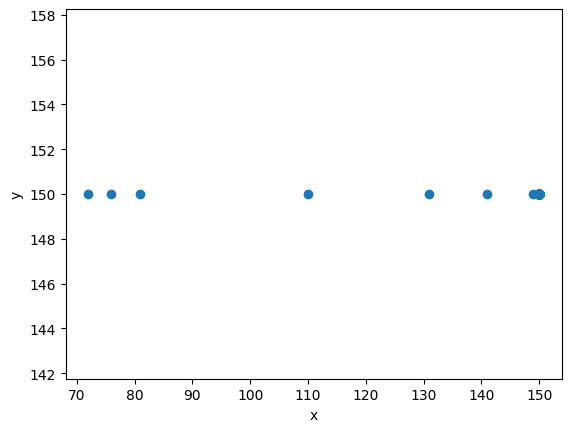

In [8]:
x = [size[0] for size in image_size_test]
y = [size[1] for size in image_size_test]
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

In [9]:
# (150, 150)に全てリサイズする
IMAGE_SIZE = (150, 150)
(train_images, train_labels), (test_images, test_labels) = load_data(concat=True, image_size=IMAGE_SIZE)

Loading ../data/seg_train


[forest]	:   0%|          | 0/2271 [00:00<?, ?it/s]

[buildings]	:   0%|          | 0/2191 [00:00<?, ?it/s]

[glacier]	:   0%|          | 0/2404 [00:00<?, ?it/s]

[street]	:   0%|          | 0/2382 [00:00<?, ?it/s]

[mountain]	:   0%|          | 0/2512 [00:00<?, ?it/s]

[sea]	:   0%|          | 0/2274 [00:00<?, ?it/s]

Loading ../data/seg_test


[forest]	:   0%|          | 0/474 [00:00<?, ?it/s]

[buildings]	:   0%|          | 0/437 [00:00<?, ?it/s]

[glacier]	:   0%|          | 0/553 [00:00<?, ?it/s]

[street]	:   0%|          | 0/501 [00:00<?, ?it/s]

[mountain]	:   0%|          | 0/525 [00:00<?, ?it/s]

[sea]	:   0%|          | 0/510 [00:00<?, ?it/s]

In [10]:
image_size_train = [image.shape for image in train_images]
image_size_train_unique = {size: image_size_train.count(size) for size in set(image_size_train)}

image_size_test = [image.shape for image in test_images]
image_size_test_unique = {size: image_size_test.count(size) for size in set(image_size_test)}

print(image_size_train_unique, image_size_test_unique)

{(150, 150, 3): 14034} {(150, 150, 3): 3000}


### 画像の種類を確認

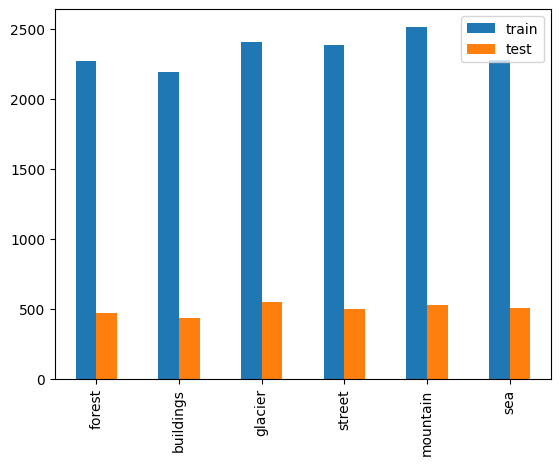

In [11]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame(
    {
        'train': train_counts,
        'test': test_counts
    },
    index=class_names).plot.bar()
plt.show()

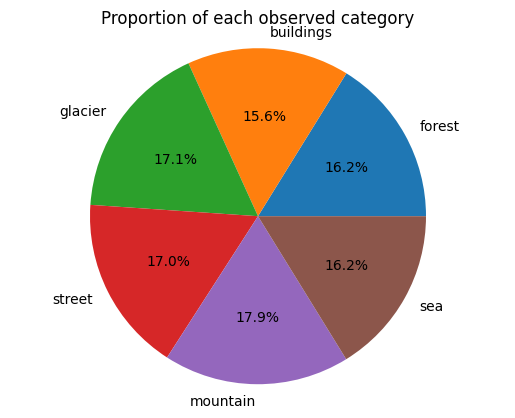

In [12]:
plt.pie(
    train_counts,
    explode=(0, 0, 0, 0, 0, 0),
    labels=class_names,
    autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [13]:
def display_examples(class_names, images, labels):
    random_indexes = np.random.choice(len(images), 25)
    images = images[random_indexes]
    labels = labels[random_indexes]

    images = images / 255.0

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

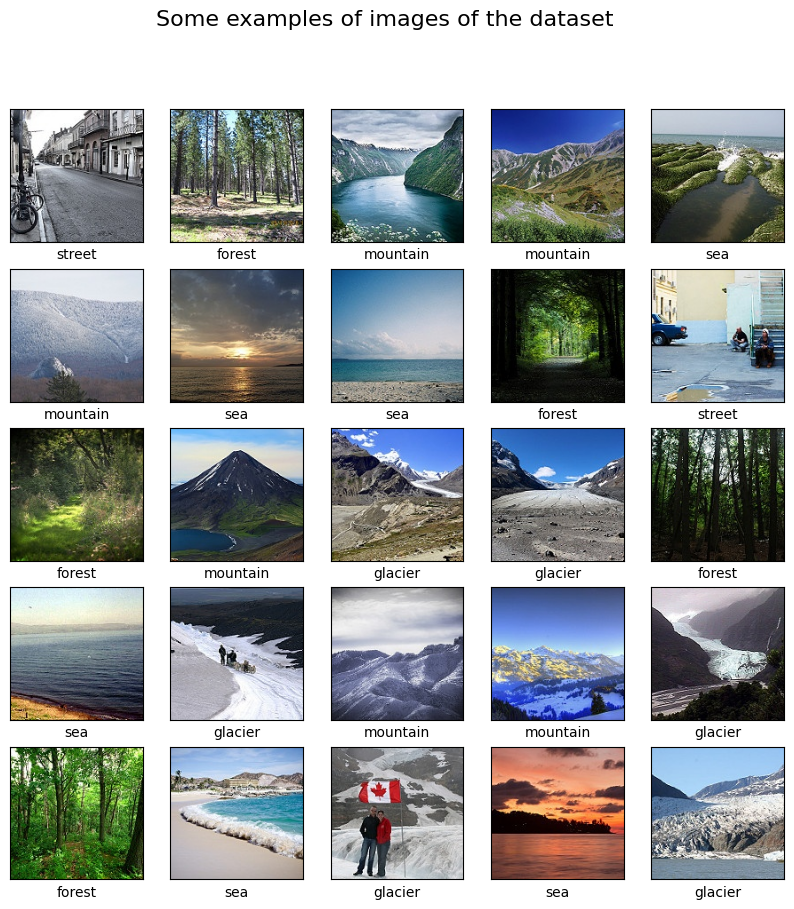

In [14]:
display_examples(class_names, test_images, test_labels)